Overview:
The dataset I chose for the Capstone Analytic Report & Research Proposal is related to mass shootings in the United States from 1966-2017. During this time period, there were approximately 400 shootings (observations). The dataset itself was available for download via Kaggle at the following link:

https://www.kaggle.com/algorrt/u-s-mass-shootings-analysis/data

Variables of Interest:
DRAFT

Motivation / Purpose of Using this Dataset:
DRAFT

Guided Questions

1. How many shootings occurred each year (1966-2017)?
    -Average number of shootings per year
    -Maximum
    -Deadliest stretches
    
    1a. Show fatalities, injuries, total victims grouped by year
    
2. What was the breakdown of shootings by state?
    -Average number of shootings per state
    -Maximum
    -Deadliest States
    
    2a. Show fatalities, injuries, total victims grouped by year
    2b. Possible deep dive on top 3 states
    
3. How many fatalities, injuries and total victims across shooting locations
   such as open, closed, or open & closed?
   
   3a. Fatality rate distribution for open / close areas (two histograms on top of eachother)
   
4. What was the distribution of shooter age?
    -Mean
    -Std Deviation
    
    4a. Shooter 'effectiveness' (scatter of age vs. fatalities)
    4b. Shooter race
    4c. Shooter gender
    4d. Mental health
    4e. Cause

In [ ]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='chesterish')
%matplotlib inline

In [184]:
#Read the dataset in and get a quick look at the underlying data
mass_shootings = pd.read_csv('Mass Shootings Dataset Ver 5.csv', encoding = "ISO-8859-1", parse_dates=['Date'])
mass_shootings.head(5)

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",2017-11-05,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",2017-11-01,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",2017-10-18,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",2017-10-01,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",2017-06-14,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


Debjit Session

1 numeric variable - boxplot or histogram
2 numeric variables - scatter plot
numeric variable with time assocation - line plot
categorical variables - bar plot
                        box plot side by side (male vs. female ex.)


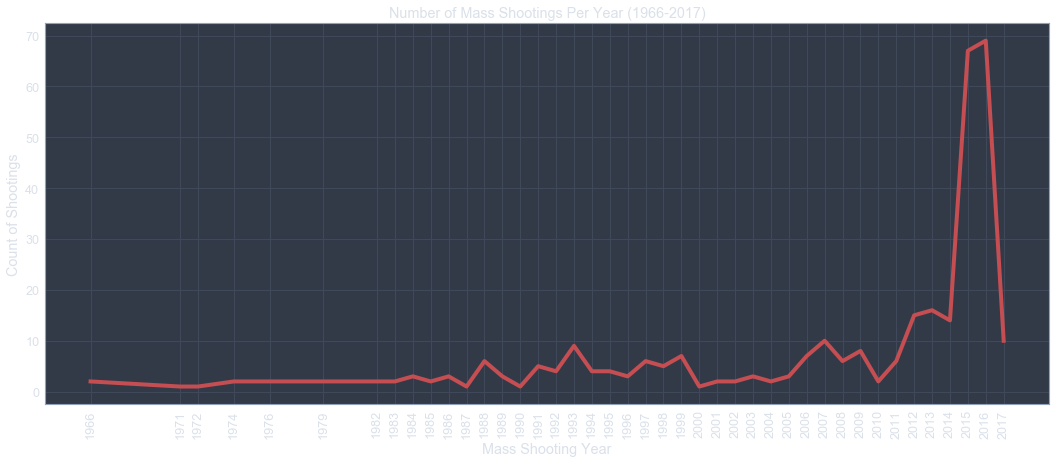

In [188]:
#First, I want to explore the number of shootings per year to get a gauge for any trends.

#Get year in its own column, create a variable (pandas series) that counts totals
mass_shootings['Year'] = mass_shootings['Date'].dt.year
count_by_year = mass_shootings['Year'].value_counts()

#Now show the plot
plt.figure(figsize=(18, 7))
plt.plot(count_by_year.sort_index(), color = 'r', linewidth = 4)
plt.xticks(count_by_year.index, rotation = 'vertical')
plt.xlabel('Mass Shooting Year')
plt.ylabel('Count of Shootings')
plt.title('Number of Mass Shootings Per Year (1966-2017)')
plt.show()

The plot above shows number of mass shootings by year from 1966-2017. To anyone looking at this plot, the most striking observation is the number of shootings that have occurred in the last few years. Specifically, 2015 and 2016 were extremely violent years. 

In [186]:
#Now, digging deeper, maybe we can see where most of these shootings are occurring at a state
#level. In order to do this, we need to separate our 'Location' column which currently gives us
#a "City, State" format.

#Create two new columns in our dataframe based on the partition method
for i in mass_shootings['Location']:
    mass_shootings['City'] = mass_shootings['Location'].str.partition(',')[0]
    mass_shootings['State'] = mass_shootings['Location'].str.partition(',')[2]

#Strip extra spaces at either end of strings and drop na's --- I don't think this worked, find
#out why with Debjit.
mass_shootings['City'].str.strip()
mass_shootings['City'].dropna()
mass_shootings['State'].str.strip()
mass_shootings['State'].dropna()

#Now print the head of the dataset to see our two new columns at the end
mass_shootings.head()


,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude,City,State
0,1,Texas church mass shooting,"Sutherland Springs, TX",2017-11-05,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,26,NaN,NaN,No,White,M,NaN,NaN,Sutherland Springs,TX
1,2,Walmart shooting in suburban Denver,"Thornton, CO",2017-11-01,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,47,NaN,NaN,No,White,M,NaN,NaN,Thornton,CO
2,3,Edgewood businees park shooting,"Edgewood, MD",2017-10-18,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN,Edgewood,MD
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",2017-10-01,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132,Las Vegas,NV
4,5,San Francisco UPS shooting,"San Francisco, CA",2017-06-14,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,38,1.0,NaN,Yes,Asian,M,NaN,NaN,San Francisco,CA


In [114]:
#The state data is not as clean as I would have hoped. I've decided to convert the format to 
#state abbreviations. Additionally, due to some data having more than one city listed in the 
#'Location' column and therefore more than one ',' which is what our partition method was based
#on, we need to re-categorize some of this data.

mass_shootings['State'].replace([' TX', ' CO', ' MD', ' NV', ' CA', ' PA', ' Florida', ' Ohio',
       ' California', ' WA', ' LA', ' Texas', ' Missouri',
       ' Virginia', ' North Carolina', ' Tennessee', ' Texas ',
       ' Kentucky', ' Alabama', ' Pennsylvania', ' Kansas',
       ' Massachusetts', '  Virginia', ' Washington', ' Arizona',
       ' Michigan', ' Mississippi', ' Nebraska', ' Colorado',
       ' Minnesota', ' Georgia', ' Maine', ' Oregon', ' South Dakota',
       ' New York', ' Louisiana', ' Illinois', ' South Carolina',
       ' Wisconsin', ' Montana', ' New Jersey', ' Indiana', ' Oklahoma',
       ' New Mexico', ' Idaho',
       ' Souderton, Lansdale, Harleysville, Pennsylvania',
       ' West Virginia', ' Nevada', ' Albuquerque, New Mexico',
       ' Connecticut', ' Arkansas', ' Utah', ' Lancaster, Pennsylvania',
       ' Vermont', ' San Diego, California', ' Hawaii', ' Alaska',
       ' Wyoming', ' Iowa'], ['TX', 'CO', 'MD', 'NV', 'CA', 'PA', 'FL', 'OH', 'CA', 'WA', 'LA',
        'TX', 'MO', 'VA', 'NC', 'TN', 'TX', 'KY', 'AL', 'PA', 'KS', 'MA', 'VA', 'WA', 'AZ', 'MI',
        'MS', 'NE', 'CO', 'MN', 'GA', 'ME', 'OR', 'SD', 'NY', 'LA', 'IL', 'SC', 'WI', 'MT',
        'NJ', 'IN', 'OK', 'NM', 'ID', 'PA', 'WV', 'NV', 'NM', 'CT', 'AR', 'UT',
        'PA', 'VT', 'CA', 'HI', 'AL', 'WY', 'IA'], inplace=True)

#Confirm that this worked
mass_shootings['State'].unique()

array(['TX', 'CO', 'MD', 'NV', 'CA', 'PA', 'FL', 'OH', 'WA', 'LA', 'MO',
       nan, 'VA', 'NC', 'TN', 'KY', 'AL', 'KS', 'MA', 'AZ', 'MI', 'MS',
       'NE', 'MN', 'GA', 'ME', 'OR', 'SD', 'NY', 'IL', 'SC', 'WI', 'MT',
       'NJ', 'IN', 'OK', 'NM', 'ID', 'WV', '', 'CT', 'AR', 'UT', 'VT',
       'HI', 'WY', 'IA'], dtype=object)

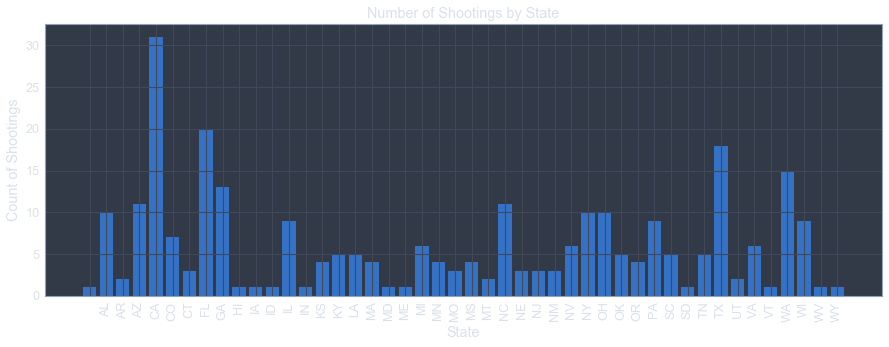

In [118]:
#Finally, now that are state data is clean, we can take a look at the number of shootings by
#state.

shooting_by_state = mass_shootings['State'].value_counts()
plt.figure(figsize=(15, 5))
plt.bar(shooting_by_state.index, shooting_by_state.values)
plt.xticks(rotation = 'vertical')
plt.xlabel('State')
plt.ylabel('Count of Shootings')
plt.title('Number of Shootings by State')
plt.show()

My first reaction to the plot above is that I was not expecting CA to lead all other states in mass shootings. On another note, taking a more political slant, the totals in FL and TX are consistent with what I expected.

Text(0.5,1,'Shootings by Location - Total Victims, Fatalities, and Injuries')

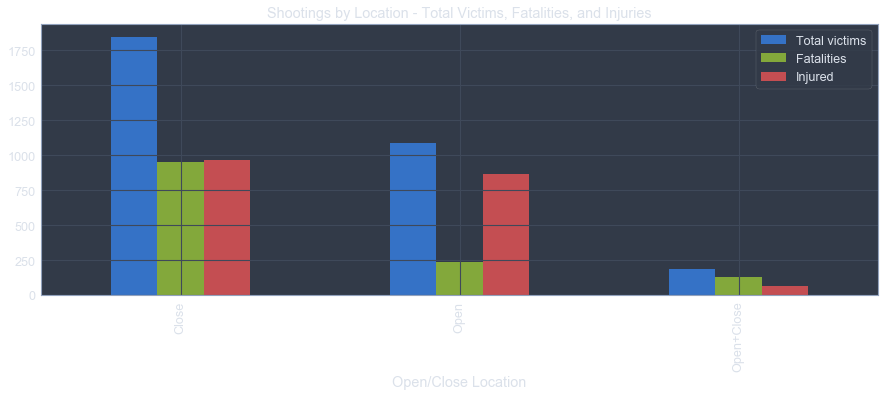

In [128]:
#Next, I want to see the sum of fatalities and injuries per each location - Open, Closed, or 
#Open + Closed.

#Noticed that there is a typo, causing a separate category (Open+CLosed of Open+Closed).
#Identify the row and change that value to be consistent with 'Open+Close'. #Find the index 
#for incorrect value:

mass_shootings.loc[mass_shootings['Open/Close Location'] == 'Open+CLose']

#Now, change the value
mass_shootings.at[280, 'Open/Close Location'] = 'Open+Close'

#Now show the plot
open_close = mass_shootings[['Open/Close Location', 'Total victims', 'Fatalities', 'Injured']].groupby('Open/Close Location').sum()
open_close.plot.bar(figsize=(15,5))
plt.title('Shootings by Location - Total Victims, Fatalities, and Injuries')

The plot above demonstrates that closed shooting locations prove to be the most harmful on a number of levels. Not only do they produce the most victims, they also produce the highest number of fatalities and injuries. Another interesting note is the difference in fatalities to injuries between closed and open locations. The difference between the two in open shooting locations may be due to the fact that potential victims can flee easier when out in the open.

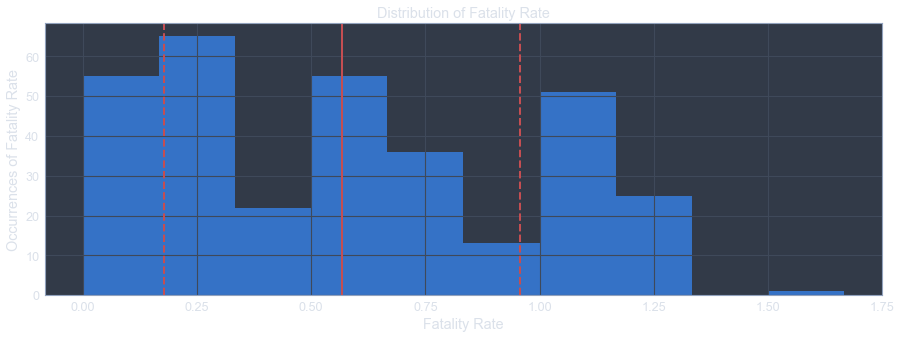

count    323.000000
mean       0.568066
std        0.390242
min        0.000000
25%        0.250000
50%        0.545455
75%        0.894444
max        1.666667
Name: Fatality Rate, dtype: float64


In [198]:
#I thought it would be interesting to see a "fatality rate" for each mass shooting incident. 
#This was calculated by dividing the number of fatalities by total number of victims.

#Plot the distribution and show mean/standard deviation to get a feel for whether or not those
#descriptive statistics are a good measure.
mass_shootings['Fatality Rate'] = mass_shootings['Fatalities']/mass_shootings['Total victims']
fatality_rate = mass_shootings['Fatality Rate']
plt.figure(figsize=(15, 5))
plt.hist(mass_shootings['Fatality Rate'])
plt.axvline(fatality_rate.mean(), color='r', linestyle='solid', linewidth=2)
plt.axvline(fatality_rate.mean() + fatality_rate.std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(fatality_rate.mean()-fatality_rate.std(), color='r', linestyle='dashed', linewidth=2) 
plt.xlabel('Fatality Rate')
plt.ylabel('Occurrences of Fatality Rate')
plt.title('Distribution of Fatality Rate')
plt.show()
print(fatality_rate.describe())

The mean (0.568) seems consistent with what I might expect. The standard deviation (0.39) on the other hand shows us how the data varies. I did not expect a possible fatality rate greater than 1 and this may be the reason for the higher standard deviation. I have two thoughts on why this may have happened, the first being that the shooter him or herself was not included as a victim, and the second being that perhaps there were data entry errors. 

In [58]:
#Next, let's see if we can dissect the 'Cause' column. After running a unique() method I
#found that several causes could be combined to provide us with some more concrete results.
#For example 'anger' should be combined into one category absorbing 'frustration' and 'revenge'.

mass_shootings['Cause'].replace(['unknown', 'terrorism', 'unemployement', 'racism',
       'frustration', 'domestic dispute', 'anger', 'psycho', 'revenge',
       'domestic disputer', 'suspension', 'religious radicalism', 'drunk',
       'failing exams', 'breakup', 'robbery'], ['Unknown', 'Terrorism', 'Unemployment', 'Racism',
        'Anger', 'Domestic Dispute', 'Anger', 'Pyschotic', 'Anger', 'Domestic Dispute',
        'Suspension', 'Religious Radicalism', 'Drunk', 'Failing Exams', 'Breakup', 
        'Robbery'], inplace=True)

#Confirm that this worked
mass_shootings['Cause'].unique()

array(['Unknown', nan, 'Terrorism', 'Unemployment', 'Racism', 'Anger',
       'Domestic Dispute', 'Pyschotic', 'Suspension',
       'Religious Radicalism', 'Drunk', 'Failing Exams', 'Breakup',
       'Robbery'], dtype=object)

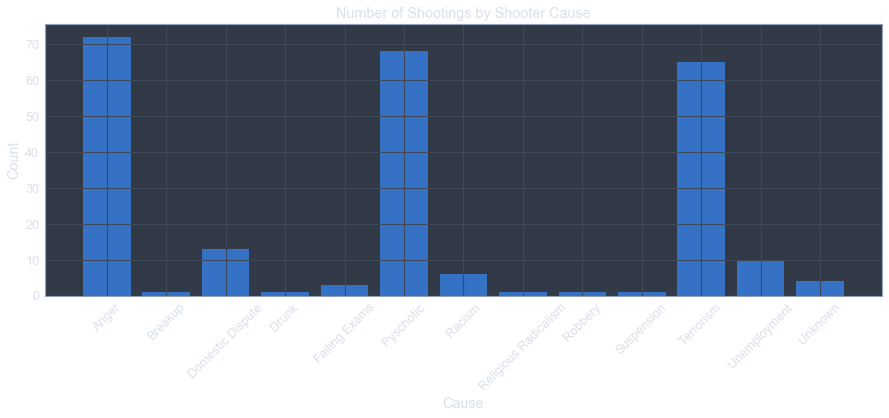

In [129]:
#Now we can plot since are categories are confirmed
cause = mass_shootings['Cause'].value_counts()
plt.figure(figsize=(15, 5))
plt.bar(cause.index, cause.values)
plt.xlabel('Cause')
plt.ylabel('Count')
plt.title('Number of Shootings by Shooter Cause')
plt.xticks(rotation = 45)
plt.show()

After combining some of the original categories, 'Anger' becomes the most prevalent. There are potential misleading characteristics to this plot as some individuals who were categorized under 'Terrorism' could also by 'Pyschotic', and are likely motivated by anger ('Angry') as well.

In [64]:
#Next, let's look at race and gender. We want to see fatalities, injuries and total victims by 
#race first. Similar to above, better groupings must be established.

#Figure this out ---- mass_shootings['Race'].dropna()
mass_shootings['Race'].replace(['White', 'Black', 'Asian', 'Latino', 'Other', 'Unknown',
       'Black American or African American',
       'White American or European American', 'Asian American',
       'Some other race', 'Two or more races',
       'Black American or African American/Unknown',
       'White American or European American/Some other Race',
       'Native American or Alaska Native', 'white', 'black',
       'Asian American/Some other race'], ['White', 'Black', 'Asian', 'Latino', 'Other', 
        'Other', 'Black', 'White', 'Asian', 'Other', 'Other', 'Black', 'White', 
        'Native', 'White', 'Black', 'Asian'], inplace=True)
mass_shootings['Race'].unique()


array(['White', 'Black', 'Asian', nan, 'Latino', 'Other', 'Native'],
      dtype=object)

Text(0.5,0,'Race')

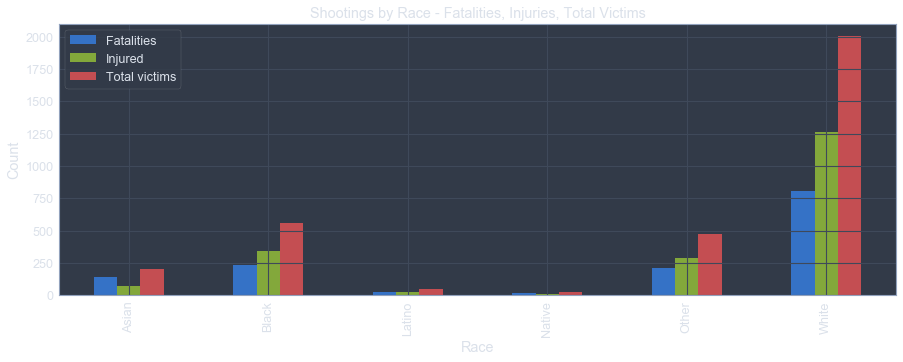

In [133]:
#Now plot once categories are set
race = mass_shootings[['Race','Fatalities','Injured', 'Total victims']].groupby('Race').sum()
race.plot.bar(figsize=(15, 5))
plt.title('Shootings by Race - Fatalities, Injuries, Total Victims')
plt.ylabel('Count')
plt.xlabel('Race')

The overwhelming majority of shooters are White, as seen above. For the most part, each race shows the same ratios of fatalities to injuries to total victims, with the exception of 'Asian'. It is worth exploring in our next plot whether or not we are speaking direclty about men or women.

In [126]:
#First, recreate the groupings
mass_shootings['Gender'].replace(['M', 'Unknown', 'Male', 'M/F', 'Male/Female', 'Female'],
['Male', 'Unknown', 'Male', 'Male & Female', 'Male & Female',
'Female'], inplace = True)

#Check that it worked
mass_shootings['Gender'].unique()

array(['Male', 'Unknown', 'Male & Female', 'Female'], dtype=object)

Text(0.5,0,'Gender')

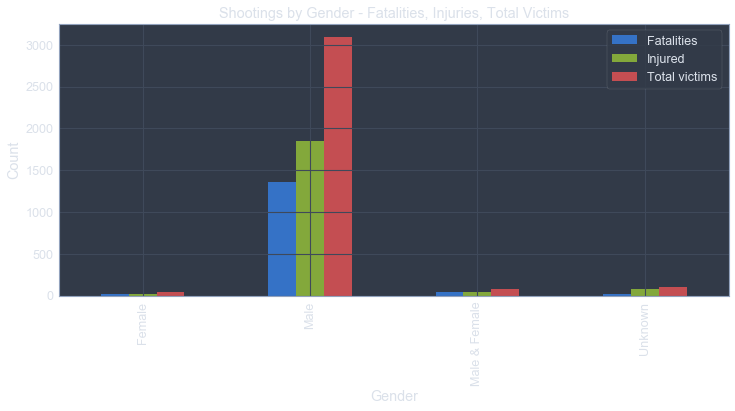

In [135]:
#Now plot once categories are set
gender = mass_shootings[['Gender','Fatalities','Injured', 'Total victims']].groupby('Gender').sum()
gender.plot.bar(figsize=(12, 5))
plt.title('Shootings by Gender - Fatalities, Injuries, Total Victims')
plt.ylabel('Count')
plt.xlabel('Gender')

My hunch was confirmed, virtually no female involvement in this mass shootings dataset. Regarding these findings, we are limited to only the context of this dataset in order to investigate further.

In [68]:
#Now let's look at mental health. I am interested to know the number of individuals with 
#known mental health issues. Again, need to combine categories first.

mass_shootings['Mental Health Issues'].replace(['No', 'Unclear', 'Yes', 'Unknown', 'unknown'],
['No', 'Unknown', 'Yes', 'Unknown', 'Unknown'], inplace=True)
mass_shootings['Mental Health Issues'].unique()

array(['No', 'Unknown', 'Yes'], dtype=object)

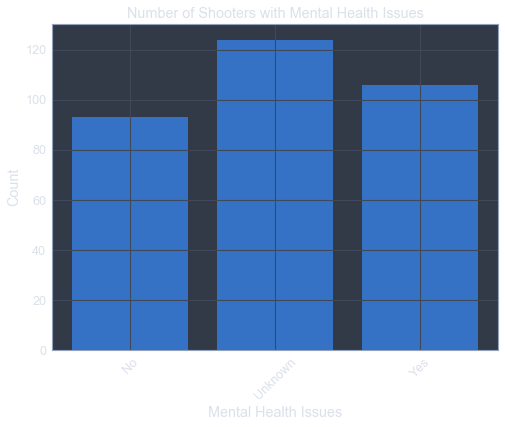

In [143]:
#Now plot once categories are set
mental_health = mass_shootings['Mental Health Issues'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(mental_health.index, mental_health.values)
plt.xlabel('Mental Health Issues')
plt.ylabel('Count')
plt.title('Number of Shooters with Mental Health Issues')
plt.xticks(rotation = 45)
plt.show()

My first thought was that the overwhelming majority would by 'Yes'. I am interested to know how exactly this data is collected and if it based solely on past mental history. The reason I say that is because it is highly probable that shooters could be undiagnosed before their shooting incident. I would think that some of the individuals who fall in the 'Unknown' category would transfer to the 'Yes' column if this were a dynamic dataset that updated over time.

In [203]:
#Finally, let's look at the distribution of shooter age. There are a couple instances where
#more than one shooter is present, let's try to separate those out first. 

def split_age_second_shooter(age):
   second_shooter_age = age.split(',')
   if len(second_shooter_age) == 2:
       return second_shooter_age[1]
   else:
       return 0

def split_age_first_shooter(age):
   first_shooter_age = age.split(',')
   if len(first_shooter_age) == 2:
       return tokens[0]
   else:
       return age

mass_shootings['Second Shooter Age'] = mass_shootings['Age'].apply(split_age_second_shooter)
mass_shootings['First Shooter Age'] = mass_shootings['Age'].apply(split_age_first_shooter)


AttributeError: 'float' object has no attribute 'split'

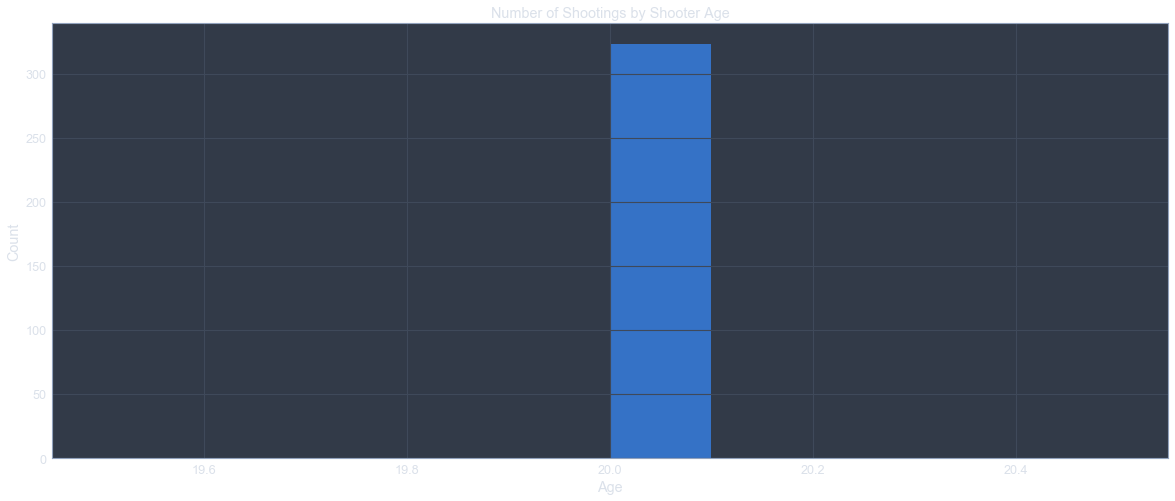

In [175]:
# #Maybe histogram/boxplot instead

# plt.figure(figsize=(20, 8))
# plt.hist(mass_shootings['Age'])
# plt.xlabel('Age')
# plt.ylabel('Count')
# plt.title('Number of Shootings by Shooter Age')
# plt.show()